# Úkol č. 1 - předzpracování dat a binární klasifikace

  * **Deadline je do 31. října 23:59**, pokud odevzdáte úkol do 7. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s příznaky, které jsou různých typů.
  * Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
  * Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.
  * V notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na podmnožiny vhodné k trénování modelu.
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit. Pro průzkum dat využívejte vizualizace.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
  * Ukázka prvních řádků souboru *results.csv*:
  
```
ID,survived
1000,0
1001,1
...
```

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí křížové validace. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Vytvořte i csv soubor s predikcemi a uložte ho v rámci projektu (`results.csv`, vedle ipython notebooku).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

* Importujeme si kniznice na pracu s datami a nastavime random seed

In [ ]:
### odtud už je to Vaše
import math
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics, datasets
from sklearn.model_selection import ParameterGrid, train_test_split, KFold, LeaveOneOut
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

random_seed = 7


* Importujeme si data z csv subor
* Spravime si rozbor dat (pocet riadkov, datove typy, ...)

In [ ]:
data = pd.read_csv('data.csv')
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      222 non-null    object 
 11  embarked   999 non-null    object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,NaN
1,1,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,"Australia Fingal, ND"
2,2,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,Belfast
3,3,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
4,4,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,"New York, NY"


* Pouzijeme vizualizacie aby sme sa blizie pozreli na rozlozenie niektorych priznakov
* Dalej sa pozrieme na suvislosti datovych bodov s vysvetlovanou premennou

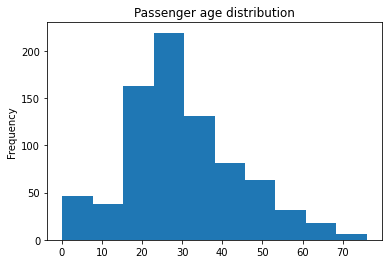

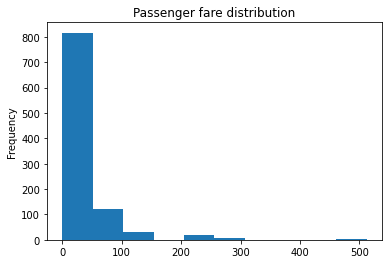

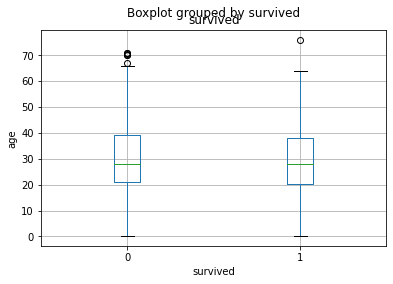

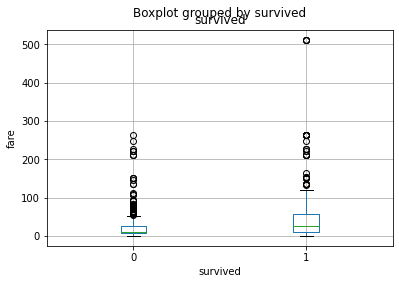

In [ ]:
data.age.plot(kind='hist', title="Passenger age distribution")
plt.show()
data.fare.plot(kind='hist', title="Passenger fare distribution")
plt.show()
ax = data.boxplot(column='age', by='survived')
ax.set_title("survived")
ax.set_ylabel("age")
plt.show()
ax = data.boxplot(column='fare', by='survived')
ax.set_title("survived")
ax.set_ylabel("fare")
plt.show()

 * Vidime ze oba tieto priznaky moju vpliv na nasu vysvetlovanu premennu
 * prejdeme k preprocessingu dat
  **1. pokus** : 
 * vek doplnime medianom
 * odstranime stlpceky ID, name, cabin, ticket, home.dest
 * zvysne stlpceky typu objekt zakodujeme pomocou one hot encoding
 * chybajuce hodnoty doplnime -1

In [ ]:
def encode_categories(df, mappers, dummies=False):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes('object').columns:
        if col not in mappers and df[col].nunique() < 30:
            df[col] = df[col].fillna('NaN')
            df[col] = label_encoder.fit_transform(df[col])
            if dummies:
                df = pd.concat([
                    df.drop(columns=[col]), pd.get_dummies(df[col], prefix=('d_' + col))
                ], axis=1)
        elif col in mappers:
            df[col] = df[col].replace(mappers[col])
    return df 

In [ ]:
data = pd.read_csv('data.csv')
def first_preprocessing(data):
    data = data.drop(columns=["name", "ID"])
    data = encode_categories(data, {})
    data = data.drop(columns=["ticket","cabin", "home.dest"])
    return data
data = first_preprocessing(data)
data.age.fillna(data.age.median(), inplace=True)
data.fare = data.fare.fillna(-1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int64  
 3   age       1000 non-null   float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      1000 non-null   float64
 7   embarked  1000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,3,1,27.0,0,0,7.7958,3
1,1,3,1,45.0,0,0,8.0500,3
2,0,2,1,28.0,0,0,0.0000,3
3,1,3,0,27.0,0,2,11.1333,3
4,0,1,1,28.0,1,0,82.1708,0


* Rozdelime data na trenovaciu (60%) a validacnu (40%) mnozinu (podla 1. bonusu)
* Postupne aplikujeme random forest classifier, decision tree classifier a adaboost 

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(
    data.drop(columns=['survived']), data.survived, test_size=0.4, random_state=random_seed
)

In [ ]:
param_grid = {
    'n_estimators': range(1, 100, 5),
    'max_depth': range(2, 5),
    'min_samples_split': range(2, 5),
    'criterion': ['gini', 'entropy'],
    'random_state': [random_seed]
}

param_comb = ParameterGrid(param_grid)

val_acc = []
for params in param_comb:
    rf = RandomForestClassifier(**params)
    rf.fit(Xtrain, ytrain)
    val_acc.append(accuracy_score(yval, rf.predict(Xval)))

rf = RandomForestClassifier(**param_comb[np.argmax(val_acc)])
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=4, n_estimators=56, random_state=7)

In [ ]:
train_acc_randf_1 = accuracy_score(ytrain, rf.predict(Xtrain))
valid_acc_randf_1 = accuracy_score(yval, rf.predict(Xval))
best_params_randf_1 = param_comb[np.argmax(val_acc)]
print(f'Train accuracy:\t{train_acc_randf_1}')
print(f'Validation accuracy:\t{valid_acc_randf_1}')
print(f'Best params:\t{best_params_randf_1}')

Train accuracy:	0.8333333333333334
Validation accuracy:	0.82
Best params:	{'random_state': 7, 'n_estimators': 56, 'min_samples_split': 2, 'max_depth': 4, 'criterion': 'gini'}


In [ ]:
param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []

for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

dt = DecisionTreeClassifier(**param_comb[np.argmax(val_acc)])
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
train_acc_dect_1 = accuracy_score(ytrain, dt.predict(Xtrain))
valid_acc_dect_1 = accuracy_score(yval, dt.predict(Xval))
best_params_dect_1 = param_comb[np.argmax(val_acc)]
print(f'Train accuracy:\t{train_acc_dect_1}')
print(f'Validation accuracy:\t{valid_acc_dect_1}')
print(f'Best params:\t{best_params_dect_1}')

Train accuracy:	0.84
Validation accuracy:	0.7975
Best params:	{'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
param_grid = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    ada = AdaBoostClassifier(**params).fit(Xtrain, ytrain)
    val_metric.append(accuracy_score(yval, ada.predict(Xval)))

best_params = param_comb[np.argmax(val_metric)]
print(f"We found the best params {best_params} with validation accuracy_score {max(val_metric):.4f}.")

ada_model = AdaBoostClassifier(**best_params).fit(Xtrain, ytrain)

We found the best params {'n_estimators': 21, 'learning_rate': 1} with validation accuracy_score 0.7900.


In [ ]:
train_acc_ada_1 = accuracy_score(ytrain, ada_model.predict(Xtrain))
valid_acc_ada_1 = accuracy_score(yval, ada_model.predict(Xval))
best_params_ada_1 = best_params
print(f'Train accuracy:\t{train_acc_ada_1}')
print(f'Validation accuracy:\t{valid_acc_ada_1}')
print(f'Best params:\t{best_params_ada_1}')

Train accuracy:	0.8166666666666667
Validation accuracy:	0.79
Best params:	{'n_estimators': 21, 'learning_rate': 1}


  **2. pokus** : 
 * vek doplnime medianom
 * odstranime stlpceky ID, name, ticket, home.dest
 * do stlpceka kabin sa pokusime pridat usporiadanie pomocou planou na titanic\
    <https://www.encyclopedia-titanica.org/titanic-deckplans/a-deck.html>
 * Predpokladame ze pasazieri zijuci vysie (alfebeticky skor) mali vacsiu sancu prezit
 * zvysne stlpceky typu objekt zakodujeme pomocou one hot encoding
 * chybajuce hodnoty doplnime -1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int64  
 3   age       1000 non-null   float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      1000 non-null   float64
 7   cabin     1000 non-null   float64
 8   embarked  1000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


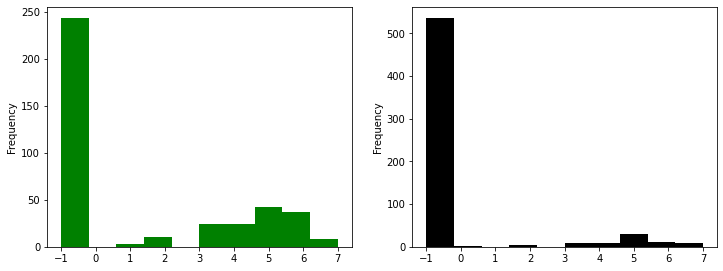

In [ ]:
data = pd.read_csv('data.csv')
#display(data.cabin.unique())
def second_preprocessing(data): 
    cabin_map = {
        'A(.*)' : 7,
        'B(.*)' : 6,
        'C(.*)' : 5,
        'D(.*)' : 4,
        'E(.*)' : 3,
        'F(.*)' : 2,
        'G(.*)' : 1,
        'T(.*)' : 0
    }

    data.cabin = data.cabin.replace(cabin_map, regex=True)
    data.cabin.fillna(-1, inplace=True)
    data = data.drop(columns=["name", "ID"])
    data = encode_categories(data, {})
    data = data.drop(columns=["ticket", "home.dest"])
    return data
data = second_preprocessing(data);

data.age.fillna(data.age.median(), inplace=True)
data = data.fillna(-1)
data.info()

#display(data.cabin.unique())


plt.figure(figsize=(12,15))
survived = data[data['survived'] == 1]
not_survived = data[data['survived'] == 0]
plt.subplot(321)
survived['cabin'].plot.hist(color='Green')
plt.subplot(322)
not_survived['cabin'].plot.hist(color='Black')
plt.show()


* Z grafou vidime ze nasa hypoteza bola pravdiva a ludia z vyssich podlazi prezivali viac
* Nasladne pokracujeme rovnako ako v 1. pokuse

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(
    data.drop(columns=['survived']), data.survived, test_size=0.4, random_state=random_seed
)


In [ ]:
param_grid = {
    'n_estimators': range(1, 100, 5),
    'max_depth': range(2, 5),
    'min_samples_split': range(2, 5),
    'criterion': ['gini', 'entropy'],
    'random_state': [random_seed]
}

param_comb = ParameterGrid(param_grid)

val_acc = []
for params in param_comb:
    rf = RandomForestClassifier(**params)
    rf.fit(Xtrain, ytrain)
    val_acc.append(accuracy_score(yval, rf.predict(Xval)))

rf = RandomForestClassifier(**param_comb[np.argmax(val_acc)])
rf.fit(Xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=96,
                       random_state=7)

In [ ]:
train_acc_randf_2 = accuracy_score(ytrain, rf.predict(Xtrain))
valid_acc_randf_2 = accuracy_score(yval, rf.predict(Xval))
best_params_randf_2 = param_comb[np.argmax(val_acc)]
print(f'Train accuracy:\t{train_acc_randf_2}')
print(f'Validation accuracy:\t{valid_acc_randf_2}')
print(f'Best params:\t{best_params_randf_2}')

Train accuracy:	0.8416666666666667
Validation accuracy:	0.815
Best params:	{'random_state': 7, 'n_estimators': 96, 'min_samples_split': 2, 'max_depth': 4, 'criterion': 'entropy'}


In [ ]:
param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []

for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

dt = DecisionTreeClassifier(**param_comb[np.argmax(val_acc)])
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
train_acc_dect_2 = accuracy_score(ytrain, dt.predict(Xtrain))
valid_acc_dect_2 = accuracy_score(yval, dt.predict(Xval))
best_params_dect_2 = param_comb[np.argmax(val_acc)]
print(f'Train accuracy:\t{train_acc_dect_2}')
print(f'Validation accuracy:\t{valid_acc_dect_2}')
print(f'Best params:\t{best_params_dect_2}')

Train accuracy:	0.84
Validation accuracy:	0.7975
Best params:	{'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
param_grid = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    ada = AdaBoostClassifier(**params).fit(Xtrain, ytrain)
    val_metric.append(accuracy_score(yval, ada.predict(Xval)))

best_params = param_comb[np.argmax(val_metric)]

ada_model = AdaBoostClassifier(**best_params).fit(Xtrain, ytrain)

In [ ]:
train_acc_ada_2 = accuracy_score(ytrain, ada_model.predict(Xtrain))
valid_acc_ada_2 = accuracy_score(yval, ada_model.predict(Xval))
best_params_ada_2 = best_params
print(f'Train accuracy:\t{train_acc_ada_2}')
print(f'Validation accuracy:\t{valid_acc_ada_2}')
print(f'Best params:\t{best_params_ada_2}')

Train accuracy:	0.8183333333333334
Validation accuracy:	0.7875
Best params:	{'n_estimators': 61, 'learning_rate': 0.3}


*Vidime ze vysledky sa zhorsili\
\
 **3. pokus** : 
* skusime si vek odhadovat pomocou linearnej regresie
* zvysok ako pokus 2

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import math

data = pd.read_csv("data.csv")

data = second_preprocessing(data)
data.info()

def fill_age(data):
    test_data = data[data["age"].isnull()]
    data.fare = data.fare.fillna(-1)
    data.dropna(inplace=True)

    y_train = data["age"]
    X_train = data.drop("age", axis=1)
    X_test = test_data.drop("age", axis=1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    test_data['age'] = y_pred
    data = pd.concat([data, test_data]).sort_index()
    data.info()
    return data
data = fill_age(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int64  
 3   age       797 non-null    float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      999 non-null    float64
 7   cabin     1000 non-null   float64
 8   embarked  1000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 70.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int64  
 3   age       1000 non-null   float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64 

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(
    data.drop(columns=['survived']), data.survived, test_size=0.4, random_state=random_seed
)

In [ ]:
param_grid = {
    'max_depth': range(1,30), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []

for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

dt = DecisionTreeClassifier(**param_comb[np.argmax(val_acc)])
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
train_acc_dect_3 = accuracy_score(ytrain, dt.predict(Xtrain))
valid_acc_dect_3 = accuracy_score(yval, dt.predict(Xval))
best_params_dect_3 = param_comb[np.argmax(val_acc)]
print(f'Train accuracy:\t{train_acc_dect_3}')
print(f'Validation accuracy:\t{valid_acc_dect_3}')
print(f'Best params:\t{best_params_dect_3}')

Train accuracy:	0.855
Validation accuracy:	0.81
Best params:	{'max_depth': 4, 'criterion': 'entropy'}


In [ ]:
param_grid = {
    'n_estimators': range(1, 100, 5),
    'max_depth': range(2, 5),
    'min_samples_split': range(2, 5),
    'criterion': ['gini', 'entropy'],
    'random_state': [random_seed]
}

param_comb = ParameterGrid(param_grid)

val_acc = []
for params in param_comb:
    rf = RandomForestClassifier(**params)
    rf.fit(Xtrain, ytrain)
    val_acc.append(accuracy_score(yval, rf.predict(Xval)))

rf_model = RandomForestClassifier(**param_comb[np.argmax(val_acc)])
rf_model.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=4, n_estimators=21, random_state=7)

In [ ]:
train_acc_randf_3 = accuracy_score(ytrain, rf_model.predict(Xtrain))
valid_acc_randf_3 = accuracy_score(yval, rf_model.predict(Xval))
best_params_randf_3 = param_comb[np.argmax(val_acc)]
print(f'Train accuracy:\t{train_acc_randf_3}')
print(f'Validation accuracy:\t{valid_acc_randf_3}')
print(f'Best params:\t{best_params_randf_3}')

Train accuracy:	0.8466666666666667
Validation accuracy:	0.825
Best params:	{'random_state': 7, 'n_estimators': 21, 'min_samples_split': 2, 'max_depth': 4, 'criterion': 'gini'}


In [ ]:
param_grid = {
    'n_estimators': range(1,100,5),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 1]
}

param_comb = ParameterGrid(param_grid)

val_metric = []
for params in param_comb:
    ada = AdaBoostClassifier(**params).fit(Xtrain, ytrain)
    val_metric.append(accuracy_score(yval, ada.predict(Xval)))

best_params = param_comb[np.argmax(val_metric)]
print(f"We found the best params {best_params} with validation accuracy_score {max(val_metric):.4f}.")

ada_model = AdaBoostClassifier(**best_params).fit(Xtrain, ytrain)

We found the best params {'n_estimators': 86, 'learning_rate': 1} with validation accuracy_score 0.7975.


In [ ]:
train_acc_ada_3 = accuracy_score(ytrain, ada_model.predict(Xtrain))
valid_acc_ada_3 = accuracy_score(yval, ada_model.predict(Xval))
best_params_ada_3 = best_params
print(f'Train accuracy:\t{train_acc_ada_3}')
print(f'Validation accuracy:\t{valid_acc_ada_3}')
print(f'Best params:\t{best_params_ada_3}')

Train accuracy:	0.8233333333333334
Validation accuracy:	0.7975
Best params:	{'n_estimators': 86, 'learning_rate': 1}


In [ ]:
accs=[valid_acc_ada_3, valid_acc_ada_2,valid_acc_ada_1, valid_acc_randf_3, valid_acc_randf_2,
      valid_acc_randf_1, valid_acc_dect_3, valid_acc_dect_2, valid_acc_dect_1]
best = np.argmax(accs)
final_best_params = best_params_randf_3
print(accs[best])

0.825


* Vidime, ze najlepsie nam performoval random forest na 3. pokuse
* Odhadneme teraz jeho presnost pomocou krizovej validacie

In [ ]:
data = pd.read_csv('data.csv')

data = second_preprocessing(data)
data = fill_age(data)

acc = []
n_splits = 5
model = RandomForestClassifier(**final_best_params)

for train, val in KFold(n_splits=n_splits).split(data.index):
    print('Fold', len(acc) + 1, '/', n_splits)
    
    Xtrain = data[data.index.isin(train)].drop(columns='survived')
    ytrain = data[data.index.isin(train)]['survived']
    Xval = data[data.index.isin(val)].drop(columns='survived')
    yval = data[data.index.isin(val)]['survived']

    model.fit(Xtrain, ytrain)
    
    acc.append(metrics.accuracy_score(yval, model.predict(Xval)))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1000 non-null   int64  
 1   pclass    1000 non-null   int64  
 2   sex       1000 non-null   int64  
 3   age       1000 non-null   float64
 4   sibsp     1000 non-null   int64  
 5   parch     1000 non-null   int64  
 6   fare      1000 non-null   float64
 7   cabin     1000 non-null   float64
 8   embarked  1000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 78.1 KB
Fold 1 / 5
Fold 2 / 5
Fold 3 / 5
Fold 4 / 5
Fold 5 / 5


In [ ]:
print('Acc: ', np.mean(acc))


Acc:  0.8150000000000001


* Presnost naseho modelu podla metody krizovej validacie je cca 0.815
* Teraz nechame model predpovedat data z evaluation a nasledne ich zapiseme do suboru

In [ ]:
data1 = pd.read_csv('evaluation.csv')
data1.head()
data1.info()
data = second_preprocessing(data1)
data = fill_age(data)
data = data.fillna(-1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        249 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      73 non-null     object 
 10  embarked   308 non-null    object 
 11  home.dest  172 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    309 non-null    int64  
 1   sex       309 non-null    int64  
 2   age    

In [ ]:
import csv

res = pd.Series(model.predict(data)).rename("survived")
ids = pd.DataFrame(data1.ID)
frames = [ids, res] 
resp = pd.concat(frames, axis=1)

f = open("results.csv",'w+')
resp.to_csv("results.csv", sep=",", index=False)
f.close


<function TextIOWrapper.close()>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d358f01e-8f1a-4a8d-8957-f3b11800c204' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>